# Analyze Results

<!--<badge>--><a href="https://colab.research.google.com/github/khuyentran1401/employee-future-prediciton/blob/master/notebooks/analyze_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

## Load Data and Model

In [1]:
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, ROCAUC
import joblib 
import pandas as pd 

In [2]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')


In [4]:
model = joblib.load('../models/XGBoost')

## Classification Report

The classification report visualizer displays the precision, recall, F1, and support scores for the model. 

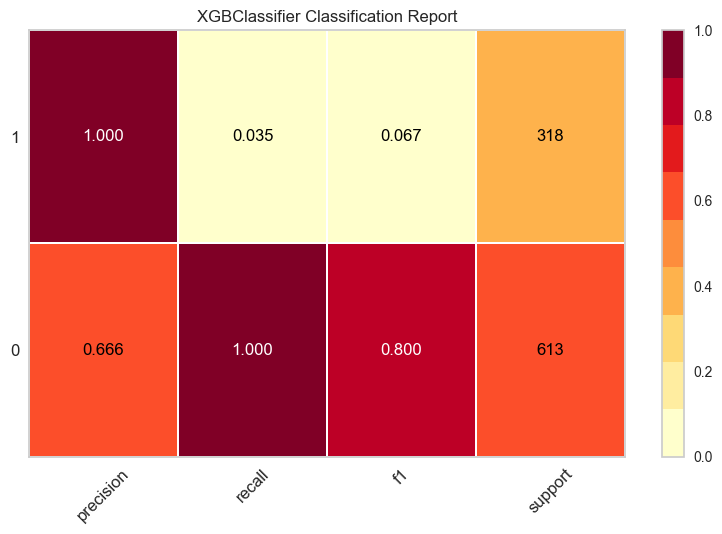

<Axes: title={'center': 'XGBClassifier Classification Report'}>

In [5]:
visualizer = ClassificationReport(model, classes=[0, 1], support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show() 

## Confusion Matrix

What is the percentage of false predictions among those who leave in 2 years? What is the percentage of false predictions among those who stay more than 2 years? The confusion matrix helps us to answer this question

c:\Users\kmorozov\Documents\Proyectos\MLOPSIT\MLOps-Innotech\.venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


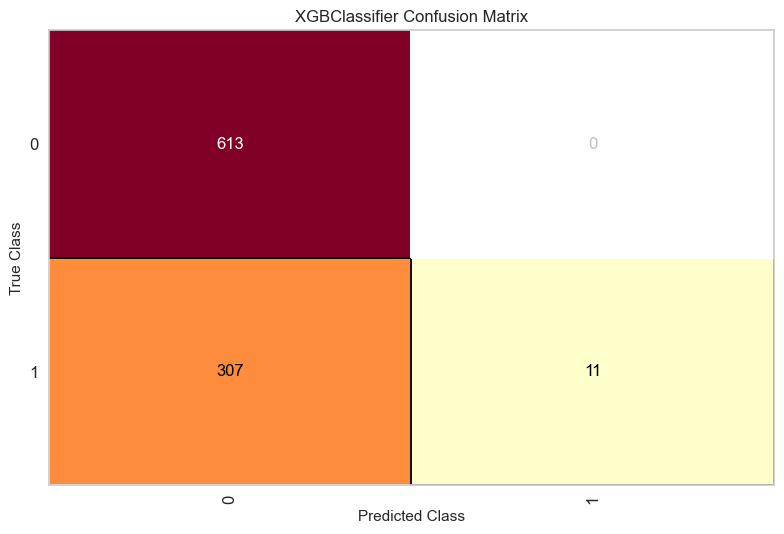

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [6]:
visualizer = ConfusionMatrix(model, classes=[0, 1])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show() 

## ROC Curve

Imagine we improve our f1 score to 99%, how do we know that it is actually better? Confusion matrix could help but instead of comparing the percentage of right prediction in each class between two models, is there an easier way to compare to the performance of two models? That is when ROC AUC would be helpful.

A ROCAUC plot allows the user to visualize the tradeoff between the classifier’s sensitivity and specificity. A ROC curve displays the true positive rate on the Y axis and the false positive rate on the X axis.

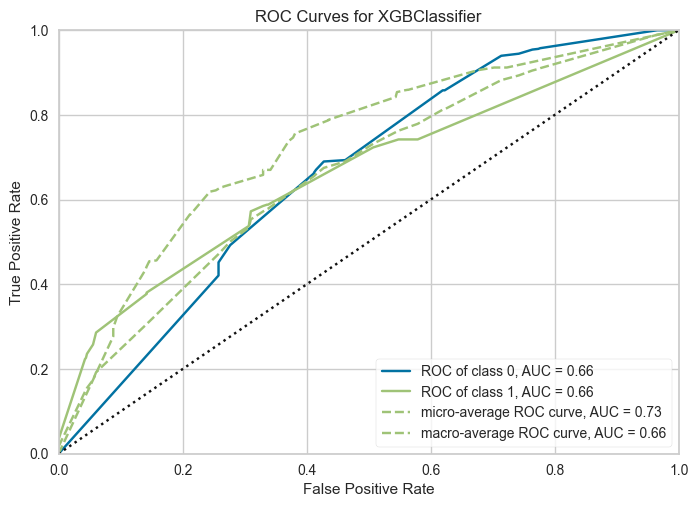

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [7]:
visualizer = ROCAUC(model, classes=[0, 1])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show() 

# Explain Model

In [8]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_train)

## SHAP Waterfall Plot

Visualize the first prediction’s explanation:

In [10]:
instance = 0

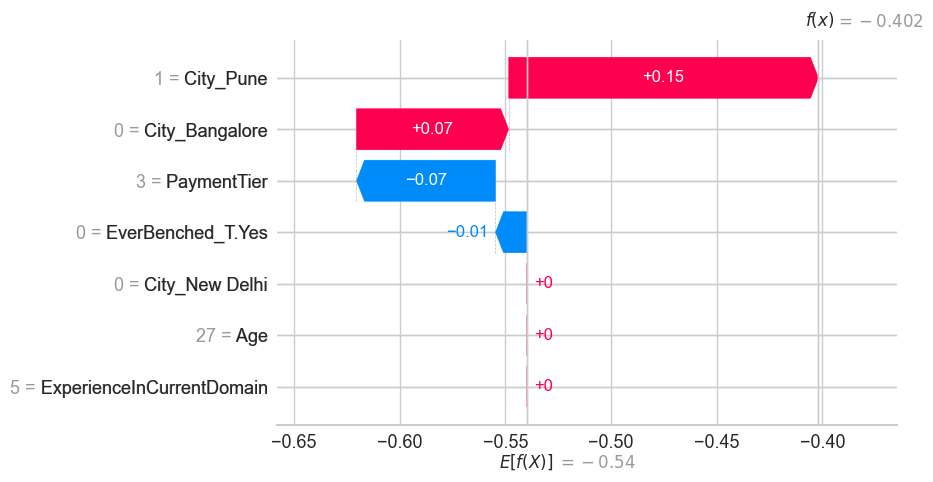

In [11]:
shap.plots.waterfall(shap_values[instance])

- The blue bar shows how much a particular feature decreases the value of the prediction.
- The red bar shows how much a particular feature increases the value of the prediction.
- Negative values imply probabilities of less than 0.5 that an employee leaves the company in 2 years.

## SHAP Bar Plot

We can also get a global feature importance plot using the SHAP bar plot.

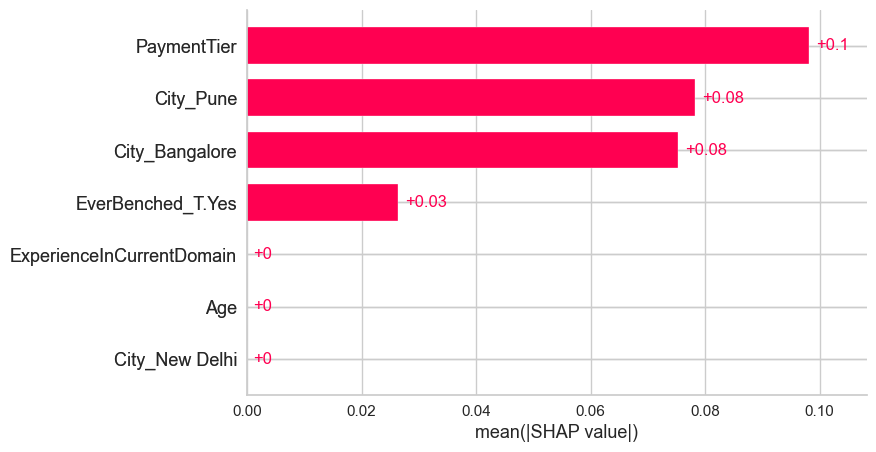

In [12]:
shap.plots.bar(shap_values)
